In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,7)
import warnings
warnings.filterwarnings('ignore')


In [3]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_excel(r'C:\Users\HP\Downloads\Poluution 2022.xlsx')
print(df)

                     City       Date   PM2.5    PM10     NO     NO2     NOx  \
0                   Delhi 2015-01-01  313.22  607.98  69.16   36.39  110.59   
1                   Delhi 2015-01-02  186.18  269.55  62.09   32.87   88.14   
2                   Delhi 2015-01-03   87.18  131.90  25.73   30.31   47.95   
3                   Delhi 2015-01-04  151.84  241.84  25.01   36.91   48.62   
4                   Delhi 2015-01-05  146.60  219.13  14.01   34.92   38.25   
...                   ...        ...     ...     ...    ...     ...     ...   
37640             Lucknow 2022-12-31  248.51    0.00  40.06   61.89   64.70   
37641              Mumbai 2022-12-31   81.34  185.04  70.64   90.08  160.67   
37642               Patna 2022-12-31  359.32    0.00  40.82  113.29   48.29   
37643             Talcher 2022-12-31   84.30  263.09   8.80    5.94   13.73   
37644  Thiruvananthapuram 2022-12-31   60.68   99.05   2.65   11.29    7.38   

          NH3     CO    SO2     O3  Benzene  Toluen

In [6]:
!pip intsall openpyxl

ERROR: unknown command "intsall" - maybe you meant "install"



In [7]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot: >

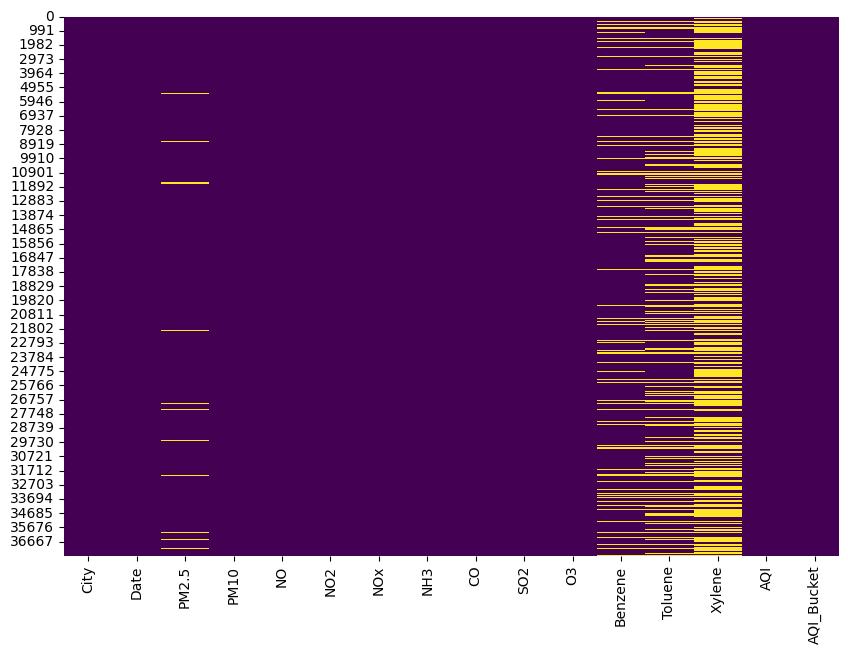

In [8]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [9]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          1058
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene        5203
Toluene        9412
Xylene        23204
AQI               0
AQI_Bucket        0
dtype: int64


In [10]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene        61.638996
Toluene       25.001992
Benzene       13.821225
PM2.5          2.810466
City           0.000000
Date           0.000000
PM10           0.000000
NO             0.000000
NO2            0.000000
NOx            0.000000
NH3            0.000000
CO             0.000000
SO2            0.000000
O3             0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,36587.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,32442.000000,28233.000000,14441.000000,37645.000000
mean,66.071027,80.829709,17.328508,29.224991,31.018930,17.075518,2.408297,14.875176,33.672488,3.331571,10.108345,3.899514,167.061894
std,60.169779,94.526281,21.563993,25.423972,30.286329,22.920877,7.437965,18.602201,21.862708,13.907285,19.714867,7.050955,145.122922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,0.000000,5.710000,11.780000,12.050000,1.080000,0.580000,5.700000,18.220000,0.240000,1.130000,0.460000,81.000000
50%,48.600000,57.080000,10.070000,22.370000,23.640000,10.660000,0.920000,9.390000,30.220000,1.300000,3.870000,1.690000,117.000000
75%,80.010000,120.860000,20.040000,38.540000,39.320000,24.050000,1.440000,15.550000,45.160000,3.420000,11.140000,4.780000,205.000000
max,914.940000,847.410000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [14]:
df['Date']=df['Date'].apply(pd.to_datetime)
df.set_index('Date',inplace=True)

KeyError: 'Date'

In [15]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [16]:
df.iloc[:,1:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))

In [18]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.360000,24.860000,9.84,472,Severe
2015-01-02,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.550000,20.090000,4.29,454,Severe
2015-01-03,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.910000,10.230000,1.99,143,Moderate
2015-01-04,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.260000,9.710000,3.34,319,Very Poor
2015-01-05,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.800000,6.210000,2.96,325,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,Lucknow,248.51,0.00,40.06,61.89,64.70,61.30,1.01,14.70,31.43,0.080000,0.900000,NaN,403,Severe
2022-12-31,Mumbai,81.34,185.04,70.64,90.08,160.67,0.00,2.57,27.19,38.87,2.210000,NaN,NaN,188,Moderate
2022-12-31,Patna,359.32,0.00,40.82,113.29,48.29,0.00,2.80,25.42,70.44,4.580000,24.400000,12.79,470,Severe


<AxesSubplot: ylabel='Date'>

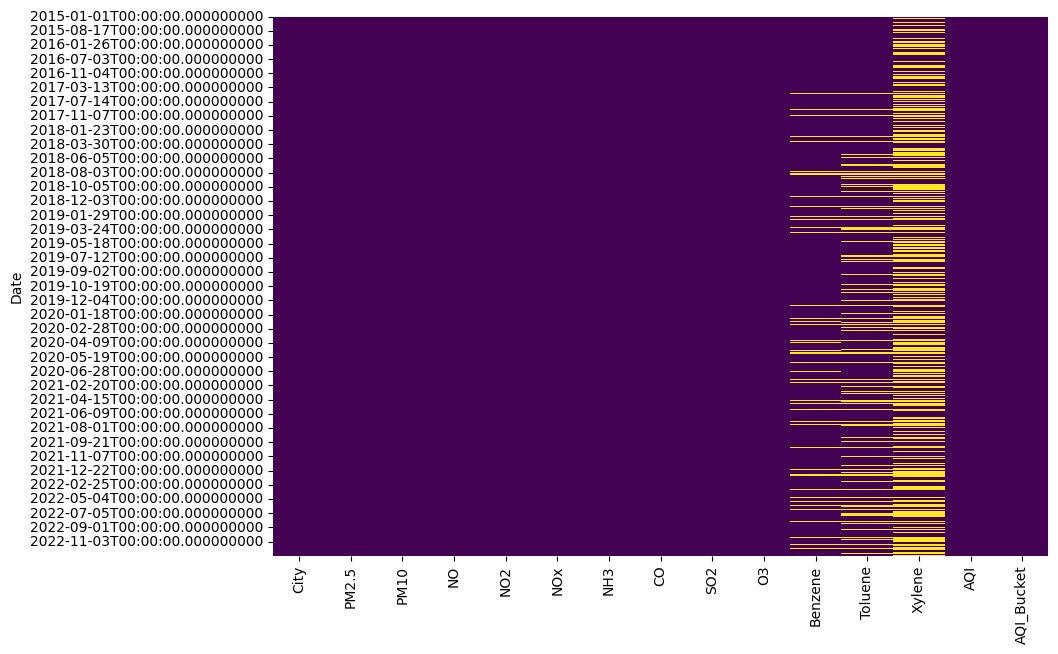

In [19]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [20]:
df.iloc[:,1:13]=df.fillna(df.mean())

In [21]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Delhi,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.360000,24.860000,472,Severe
2015-01-02,Delhi,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.550000,20.090000,454,Severe
2015-01-03,Delhi,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.910000,10.230000,143,Moderate
2015-01-04,Delhi,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.260000,9.710000,319,Very Poor
2015-01-05,Delhi,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.800000,6.210000,325,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,Lucknow,Lucknow,248.51,0.00,40.06,61.89,64.70,61.30,1.01,14.70,31.43,0.080000,0.900000,403,Severe
2022-12-31,Mumbai,Mumbai,81.34,185.04,70.64,90.08,160.67,0.00,2.57,27.19,38.87,2.210000,9.593441,188,Moderate
2022-12-31,Patna,Patna,359.32,0.00,40.82,113.29,48.29,0.00,2.80,25.42,70.44,4.580000,24.400000,470,Severe


<AxesSubplot: ylabel='Date'>

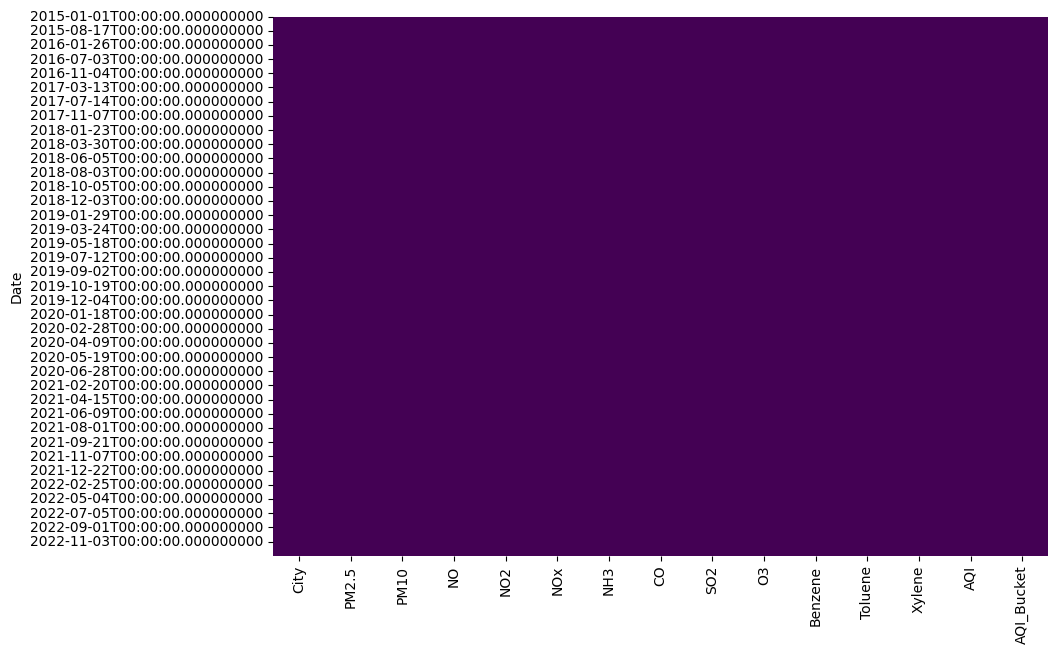

In [23]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [24]:
df.describe()

,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000,37645.000000
mean,65.893669,80.829709,17.328508,29.224991,31.018930,17.075518,2.408297,14.875176,33.672488,3.274798,9.593441,167.061894
std,59.349811,94.526281,21.563993,25.423972,30.286329,22.920877,7.437965,18.602201,21.862708,12.917779,17.209071,145.122922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,29.390000,0.000000,5.710000,11.780000,12.050000,1.080000,0.580000,5.700000,18.220000,0.330000,1.540000,81.000000
50%,49.580000,57.080000,10.070000,22.370000,23.640000,10.660000,0.920000,9.390000,30.220000,1.640000,5.900000,117.000000
75%,78.660000,120.860000,20.040000,38.540000,39.320000,24.050000,1.440000,15.550000,45.160000,3.274798,9.593441,205.000000
max,914.940000,847.410000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,2049.000000


In [25]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Delhi,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.360000,24.860000,472,Severe
2015-01-02,Delhi,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.550000,20.090000,454,Severe
2015-01-03,Delhi,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.910000,10.230000,143,Moderate
2015-01-04,Delhi,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.260000,9.710000,319,Very Poor
2015-01-05,Delhi,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.800000,6.210000,325,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,Lucknow,Lucknow,248.51,0.00,40.06,61.89,64.70,61.30,1.01,14.70,31.43,0.080000,0.900000,403,Severe
2022-12-31,Mumbai,Mumbai,81.34,185.04,70.64,90.08,160.67,0.00,2.57,27.19,38.87,2.210000,9.593441,188,Moderate
2022-12-31,Patna,Patna,359.32,0.00,40.82,113.29,48.29,0.00,2.80,25.42,70.44,4.580000,24.400000,470,Severe


In [26]:
df.head

<bound method NDFrame.head of                           City               PM2.5    PM10      NO    NO2  \
Date                                                                        
2015-01-01               Delhi               Delhi  313.22  607.98  69.16   
2015-01-02               Delhi               Delhi  186.18  269.55  62.09   
2015-01-03               Delhi               Delhi   87.18  131.90  25.73   
2015-01-04               Delhi               Delhi  151.84  241.84  25.01   
2015-01-05               Delhi               Delhi  146.60  219.13  14.01   
...                        ...                 ...     ...     ...    ...   
2022-12-31             Lucknow             Lucknow  248.51    0.00  40.06   
2022-12-31              Mumbai              Mumbai   81.34  185.04  70.64   
2022-12-31               Patna               Patna  359.32    0.00  40.82   
2022-12-31             Talcher             Talcher   84.30  263.09   8.80   
2022-12-31  Thiruvananthapuram  Thiruvananthap

In [27]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Delhi,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472,Severe
2015-01-02,Delhi,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454,Severe
2015-01-03,Delhi,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143,Moderate
2015-01-04,Delhi,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319,Very Poor
2015-01-05,Delhi,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325,Very Poor


In [28]:
df.isna().sum()

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

<AxesSubplot: ylabel='Date'>

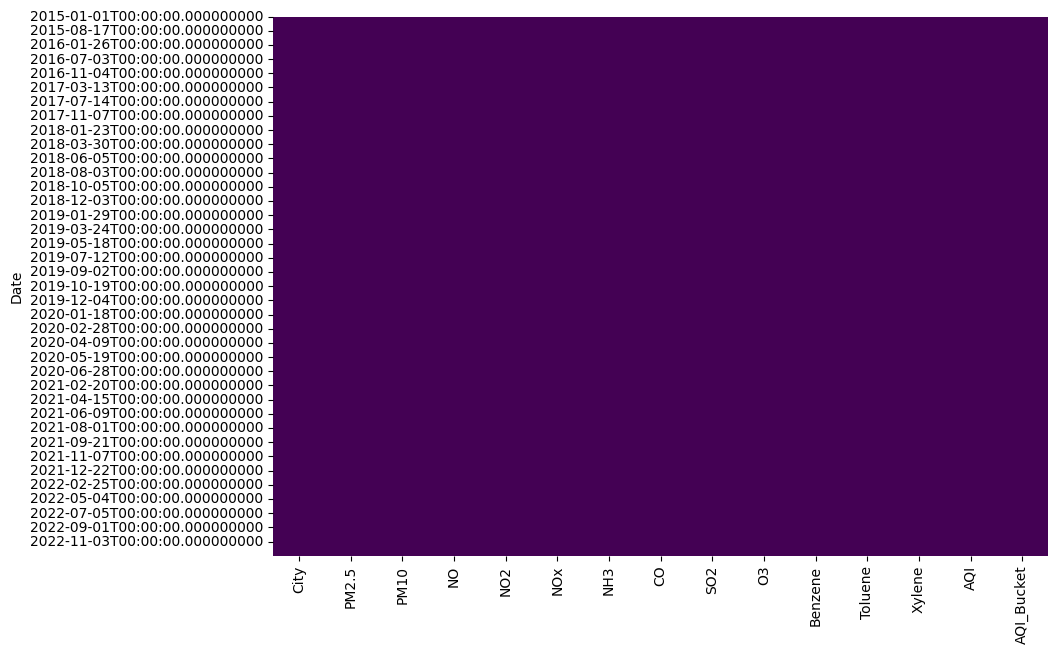

In [29]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

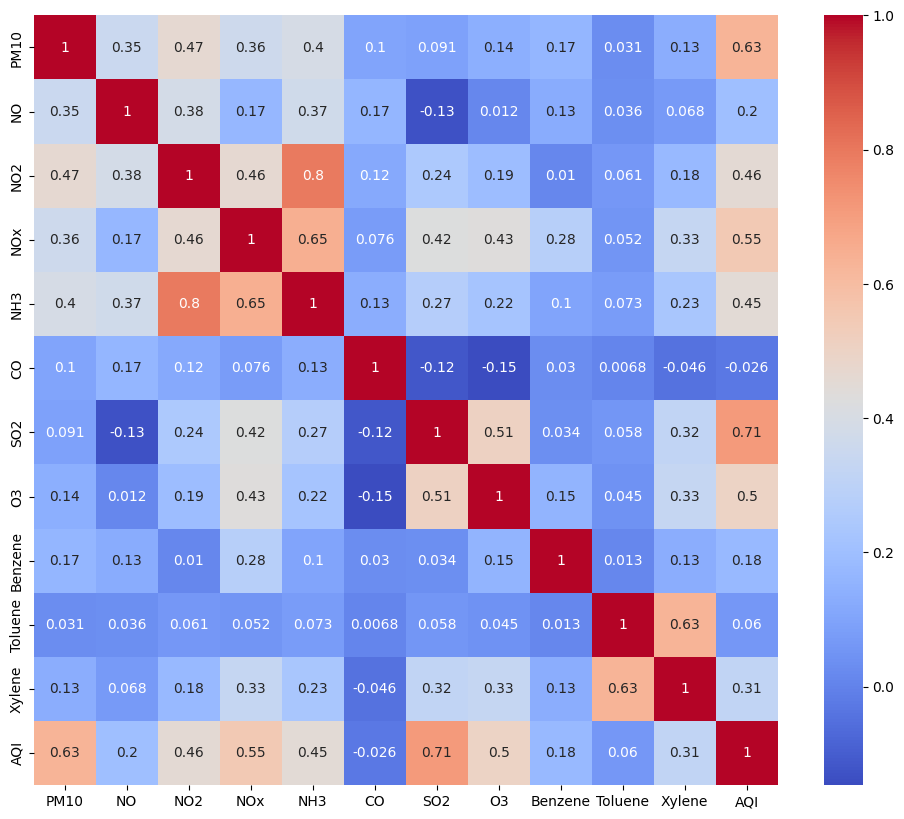

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

In [34]:
poluution = ['PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
df_City = df_City[poluution]

print('Distribution of different pollutants in last 5 years')
df_City.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

NameError: name 'df_City' is not defined

In [35]:
final_df =df[['AQI','AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
Date,,
2015-01-01,472,Severe
2015-01-02,454,Severe
2015-01-03,143,Moderate
2015-01-04,319,Very Poor
2015-01-05,325,Very Poor
...,...,...
2022-12-31,403,Severe
2022-12-31,188,Moderate
2022-12-31,470,Severe


In [36]:
final_df['AQI_Bucket'].unique()

array(['Severe', 'Moderate', 'Very Poor', 'Poor', 'Satisfactory', 'Good'],
      dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37645 entries, 2015-01-01 to 2022-12-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        37645 non-null  object 
 1   PM2.5       37645 non-null  object 
 2   PM10        37645 non-null  float64
 3   NO          37645 non-null  float64
 4   NO2         37645 non-null  float64
 5   NOx         37645 non-null  float64
 6   NH3         37645 non-null  float64
 7   CO          37645 non-null  float64
 8   SO2         37645 non-null  float64
 9   O3          37645 non-null  float64
 10  Benzene     37645 non-null  float64
 11  Toluene     37645 non-null  float64
 12  Xylene      37645 non-null  float64
 13  AQI         37645 non-null  int64  
 14  AQI_Bucket  37645 non-null  object 
dtypes: float64(11), int64(1), object(3)
memory usage: 4.6+ MB


In [39]:
df.AQI_Bucket = df.AQI_Bucket.fillna(0)
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
Date,,
2015-01-01,472,5
2015-01-02,454,5
2015-01-03,143,2
2015-01-04,319,4
2015-01-05,325,4


In [40]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [61]:
y_pred = clf.predict(np.array([6.5]).reshape(1,1))

In [67]:
print("Enter the value of AQI:")
AQI = float(input("AQI : "))
output = clf.predict([[AQI]])
output
#0-->Good
#1-->Satisfactory
#2-->moderate
#3-->poor
#4-->Very poor
#5-->Severe

Enter the value of AQI:
AQI : 110


array([2])

In [68]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       1.00      1.00      1.00      3154
           2       1.00      1.00      1.00      3359
           3       1.00      1.00      1.00      1012
           4       1.00      1.00      1.00       835
           5       1.00      1.00      1.00       550

    accuracy                           1.00      9412
   macro avg       1.00      1.00      1.00      9412
weighted avg       1.00      1.00      1.00      9412

[[ 502    0    0    0    0    0]
 [   0 3154    0    0    0    0]
 [   0    0 3359    0    0    0]
 [   0    0    0 1012    0    0]
 [   0    0    0    0  835    0]
 [   0    0    0    0    0  550]]
